In [1]:
from analysis import *

# Average Query Length

In [2]:
# Average query length vs. Programming XP, Python XP, and Professional (industry) XP
sql_query = """
SELECT participants.participant_id,
       queries.query_id,
       queries.query_content
FROM queries
INNER JOIN participants
ON queries.participant_id=participants.participant_id;
"""
cur.execute(sql_query)
results = cur.fetchall()

participant_ids = [i for i in range(1, num_participants + 1)]
num_chars = [[] for k in range(num_participants)]
avg_num_chars = [0 for k in range(num_participants)]
num_words = [[] for k in range(num_participants)]
avg_num_words = [0 for k in range(num_participants)]

for r in results:
    # r is a tuple where
    # r[0] = participant_id
    # r[1] = query_id
    # r[2] = query_content
    num_chars[r[0]-1].append(len(r[2]))
    num_words[r[0]-1].append(len(r[2].split()))

for i, nc in enumerate(num_chars):
    avg_num_chars[i] = np.mean(nc)

for i, nw in enumerate(num_words):
    avg_num_words[i] = np.mean(nw)

### Spearman's Tests

SPEARMAN'S R FOR PROGRAMMING XP VS. Average Query Length (characters): 0.29183543422975483
P-VALUE (TWO-TAILED): 0.06766888629941152
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PYTHON XP VS. Average Query Length (characters): 0.3635956105636489
P-VALUE (TWO-TAILED): 0.021098214756310105
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PROFESSIONAL XP VS. Average Query Length (characters): -0.05002053031466311
P-VALUE (TWO-TAILED): 0.8341162985950449


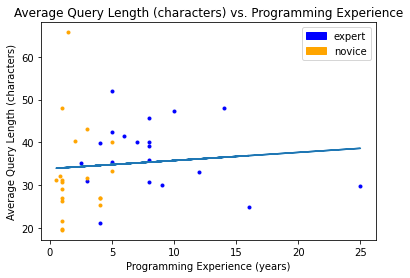

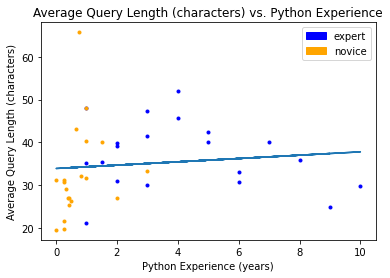

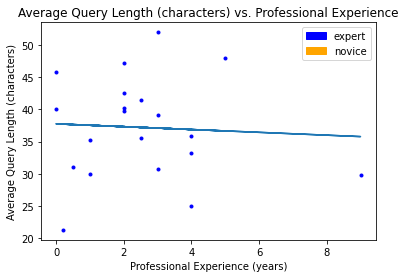

In [3]:
# Average number of characters in query vs. Years of Experience
get_xp_correlation(avg_num_chars, "Average Query Length (characters)")

SPEARMAN'S R FOR PROGRAMMING XP VS. Average Query Length (words): 0.28749599134129505
P-VALUE (TWO-TAILED): 0.07204769577249262
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PYTHON XP VS. Average Query Length (words): 0.3811202910948288
P-VALUE (TWO-TAILED): 0.015251761141623578
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PROFESSIONAL XP VS. Average Query Length (words): 0.0075817190357752185
P-VALUE (TWO-TAILED): 0.9746925343916769


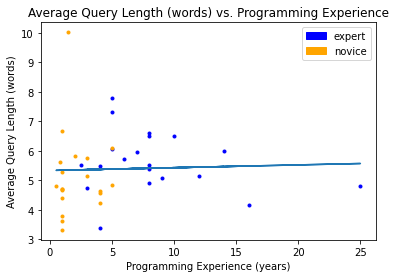

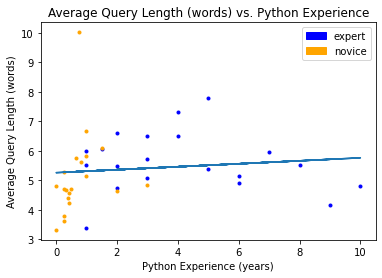

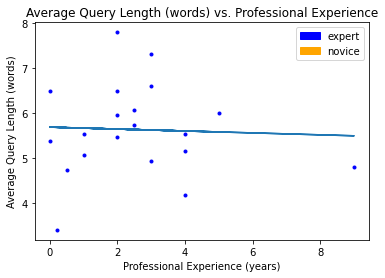

In [4]:
# Average number of words in query vs. Years of Experience
get_xp_correlation(avg_num_words, "Average Query Length (words)")

## Python Queries Containing the Word 'Python' or 'Python3'

SPEARMAN'S R FOR PROGRAMMING XP VS. Percentage of Queries Containing 'Python': 0.22509080750165916
P-VALUE (TWO-TAILED): 0.16257844538269967
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PYTHON XP VS. Percentage of Queries Containing 'Python': 0.036106180415679964
P-VALUE (TWO-TAILED): 0.8249473025108935
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PROFESSIONAL XP VS. Percentage of Queries Containing 'Python': 0.1879559320914614
P-VALUE (TWO-TAILED): 0.42745629121036455


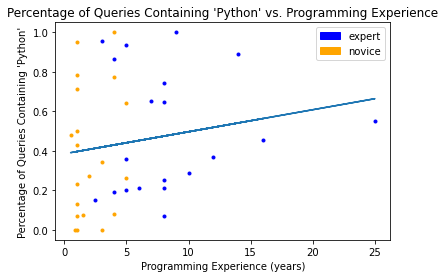

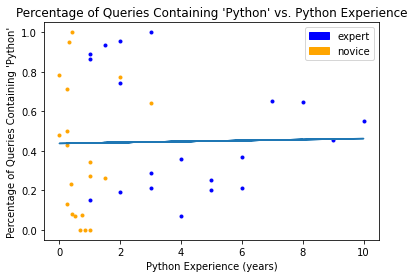

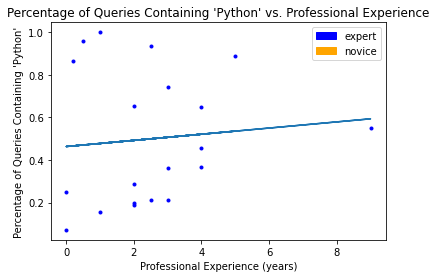

In [8]:
# Average percentage of queries with the terms 'python' or 'python3' (per participant)

# validated by calculating by hand percentage of queries containing 'python'
# (case-insensitive) from participant 1 to num_participants
python_in_query_percentage = [0 for k in range(num_participants)]

for p_id in range(1, num_participants + 1):
    df = pd.read_sql("""
            SELECT query_content FROM queries
            WHERE participant_id=%s;
            """, con = credentials, params= (p_id,))
    num_queries_with_python = df.query_content.str.contains('python', regex=False).sum()
    python_in_query_percentage[p_id-1] = num_queries_with_python/len(df)

# Show correlations with XP
y = np.asarray(python_in_query_percentage)

get_xp_correlation(y, "Percentage of Queries Containing 'Python'")

# Levenshtein distance between search query and error message

The following section calculates, for each participant, the average Levenshtein distance between their search queries and the original error message for the given stimuli.

SPEARMAN'S R FOR PROGRAMMING XP VS. Query to Error Message Distance: -0.041258187199796716
P-VALUE (TWO-TAILED): 0.8004437470707714
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PYTHON XP VS. Query to Error Message Distance: -0.18608038366148952
P-VALUE (TWO-TAILED): 0.2502954406944018
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PROFESSIONAL XP VS. Query to Error Message Distance: 0.21675563136354015
P-VALUE (TWO-TAILED): 0.3586588155786622


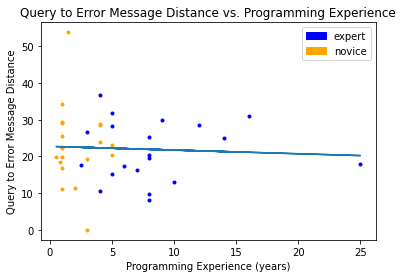

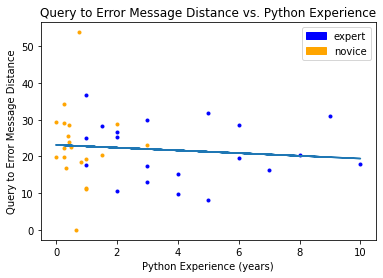

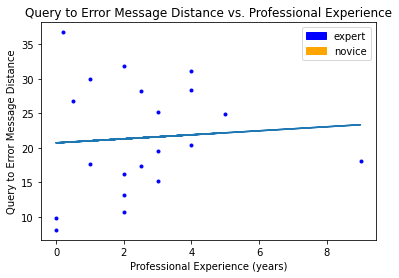

In [12]:
from Levenshtein import distance as levenshtein_distance

query_distances = [[] for k in range(num_participants)]
avg_query_distance = [0 for k in range(num_participants)]

for p_id in range(1, num_participants + 1):
    df = pd.read_sql("""
            SELECT
                queries.query_content,
                stimuli.error_type,
                stimuli.error_message
            FROM queries
            INNER JOIN stimuli USING (stimuli_id)
            WHERE participant_id=%s
            """, con = credentials, params= (p_id,))
    
    for i in range(len(df)):
        query_distances[p_id - 1].append(
            levenshtein_distance(df.iloc[i].query_content,
                                 df.iloc[i].error_message)
        )

avg_query_distance = list(map(lambda x: sum(x)/len(x), query_distances))

# Show correlations with XP
y = np.asarray(avg_query_distance)

get_xp_correlation(y, "Query to Error Message Distance")

In [13]:
# Perform an ANOVA test using f_oneway from scipy.stats
# Categorical variable: xp_level
# Continuous variable: Levenshtein edit distance between error message and query
df = pd.read_sql("""
            SELECT *
            FROM participants
            ORDER BY participant_id
            """, con = credentials)

df['avg_query_error_distance']= avg_query_distance

fvalue, pvalue = stats.f_oneway(df[df['xp_level'] == 'Expert'].avg_query_error_distance,
                          df[df['xp_level'] == 'Python Novice'].avg_query_error_distance,
                          df[df['xp_level'] == 'True Novice'].avg_query_error_distance)
print("ANOVA f-value:",fvalue)
print("ANOVA p-value:",pvalue)

ANOVA f-value: 0.3131301922593521
ANOVA p-value: 0.733073208854349


In [14]:
# Check Assumptions: Normality
from statsmodels.formula.api import ols
model = ols('avg_query_error_distance ~ C(xp_level)', data=df).fit()

stats.shapiro(model.resid) # Returns (W-test statistic, p-value)

ShapiroResult(statistic=0.9638729095458984, pvalue=0.22669054567813873)

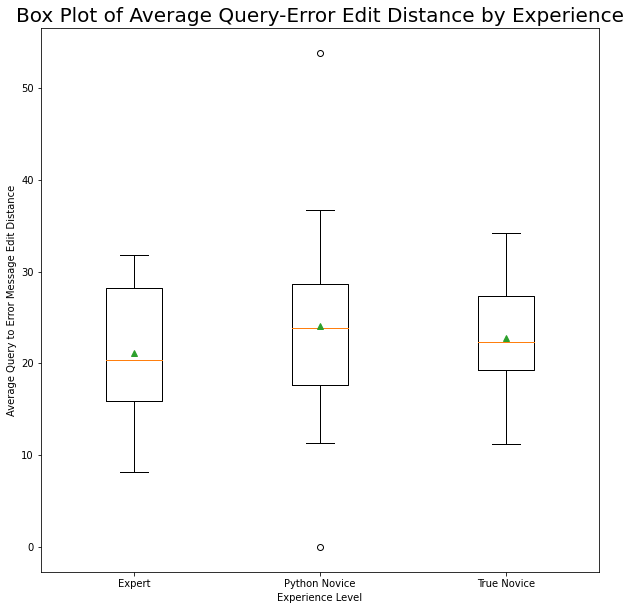

In [15]:
# Check Assumptions: Homogeneity of variance
# https://www.pythonfordatascience.org/anova-python/
stats.levene(df['avg_query_error_distance'][df['xp_level'] == 'Expert'],
             df['avg_query_error_distance'][df['xp_level'] == 'Python Novice'],
             df['avg_query_error_distance'][df['xp_level'] == 'True Novice'])

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Average Query-Error Edit Distance by Experience", fontsize= 20)
ax.set

data = [df['avg_query_error_distance'][df['xp_level'] == 'Expert'],
        df['avg_query_error_distance'][df['xp_level'] == 'Python Novice'],
        df['avg_query_error_distance'][df['xp_level'] == 'True Novice']]

ax.boxplot(data,
           labels= ['Expert', 'Python Novice', 'True Novice'],
           showmeans= True)

plt.xlabel("Experience Level")
plt.ylabel("Average Query to Error Message Edit Distance")

plt.show()

SPEARMAN'S R FOR AVERAGE SESSION TIME VS. Query to Error Message Distance: 0.12270168855534712
P-VALUE (TWO-TAILED): 0.4506795103716329


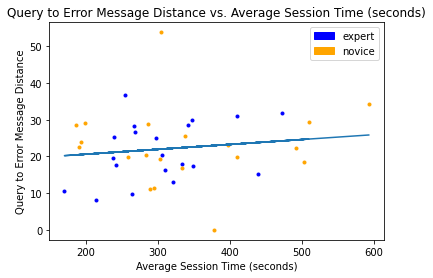

In [16]:
get_avg_session_time_correlation(y, "Query to Error Message Distance")

# Error Type in Search Query

SPEARMAN'S R FOR PROGRAMMING XP VS. Percentage of Queries Containing Error Type: 0.23062121542446434
P-VALUE (TWO-TAILED): 0.15222765521302498
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PYTHON XP VS. Percentage of Queries Containing Error Type: 0.2618323526135613
P-VALUE (TWO-TAILED): 0.10266333239345493
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PROFESSIONAL XP VS. Percentage of Queries Containing Error Type: -0.18049779295718868
P-VALUE (TWO-TAILED): 0.44634507590186856


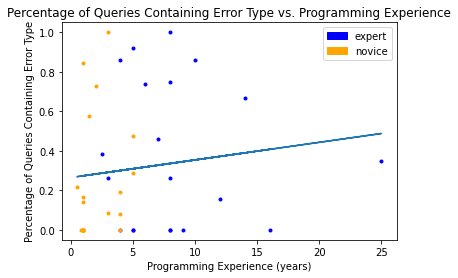

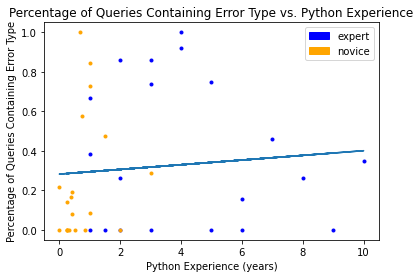

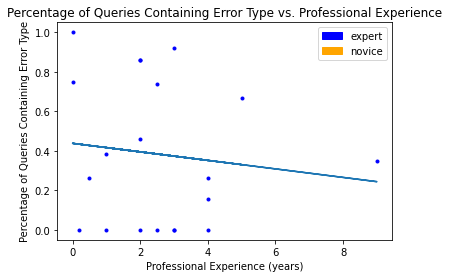

In [17]:
# Percentage of queries with the corresponding error type in search query

error_type_query_percentage = [0 for k in range(num_participants)]

for p_id in range(1, num_participants + 1):
    df = pd.read_sql("""
            SELECT
                queries.query_content,
                stimuli.error_type
            FROM queries
            INNER JOIN stimuli USING (stimuli_id)
            WHERE participant_id=%s
            """, con = credentials, params= (p_id,))
    num_queries_with_error_type = sum([x[1].lower() in x[0].lower() for x in zip(df.query_content, df.error_type)])
    error_type_query_percentage[p_id-1] = num_queries_with_error_type/len(df)

# Show correlations with XP
y = np.asarray(error_type_query_percentage)

get_xp_correlation(y, "Percentage of Queries Containing Error Type")

In [18]:
np.asarray(error_type_query_percentage)

array([0.        , 0.        , 0.        , 1.        , 0.66666667,
       0.75      , 0.26086957, 0.        , 0.35      , 0.15789474,
       0.92      , 0.46153846, 0.        , 0.85714286, 0.85714286,
       0.26470588, 0.        , 0.73684211, 0.38461538, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.16666667,
       0.84615385, 0.        , 0.        , 0.2173913 , 0.        ,
       0.08571429, 1.        , 0.47368421, 0.08      , 0.575     ,
       0.        , 0.72727273, 0.28571429, 0.19047619, 0.14285714])

# Edit Distance Between Search Queries

In [19]:
df = pd.read_sql("""
            SELECT * FROM queries;
            """, con = credentials)

,query_id,participant_id,stimuli_id,start_query,end_query
count,775.000000,775.000000,775.000000,768,768
mean,2076.833548,21.720000,11.562581,0 days 00:21:20.346354166,0 days 00:21:25.878906250
std,1008.626063,10.999427,8.617535,0 days 00:13:00.363858793,0 days 00:13:00.011986116
min,815.000000,1.000000,0.000000,0 days 00:00:28,0 days 00:00:29
25%,1008.500000,12.000000,4.000000,0 days 00:10:25.250000,0 days 00:10:28.250000
50%,2824.000000,22.000000,11.000000,0 days 00:21:08,0 days 00:21:15
75%,3017.500000,31.000000,19.000000,0 days 00:32:03,0 days 00:32:05
max,3211.000000,40.000000,28.000000,0 days 00:50:22,0 days 00:50:24


In [42]:
def label_group(row):
    if row['participant_id'] in experts :
        return 'Expert'
    if row['participant_id'] in middle:
        return 'Python Novice'
    if row['participant_id'] in novices:
        return 'True Novice'
    return 'No Group'

df['xp_level'] = df.apply (lambda row: label_group(row), axis=1)
df

,query_id,participant_id,stimuli_id,start_query,end_query,query_content,xp_level,next_query,prev_query,edit_distance
0,815,1,23,0 days 00:00:58,0 days 00:01:08,list has not attribute split python3,Expert,NaN,NaN,NaN
1,816,1,6,0 days 00:03:28,0 days 00:03:38,funtion object is not scriptable python3,Expert,NaN,NaN,NaN
2,817,1,21,0 days 00:07:28,0 days 00:07:45,multiple variabls in for using and python3,Expert,name not defined in for loop python3,NaN,NaN
3,818,1,21,0 days 00:09:14,0 days 00:09:22,name not defined in for loop python3,Expert,and keyword in for loops python3,multiple variabls in for using and python3,24.0
4,819,1,21,0 days 00:11:03,0 days 00:11:14,and keyword in for loops python3,Expert,name not defined in for loop python3,name not defined in for loop python3,12.0
...,...,...,...,...,...,...,...,...,...,...
770,3207,40,5,NaT,NaT,how to comment in python,True Novice,python str function arguments,NaN,NaN
771,3208,40,5,NaT,NaT,python str function arguments,True Novice,python str function,how to comment in python,22.0
772,3209,40,5,NaT,NaT,python str function,True Novice,NaN,python str function arguments,10.0
773,3210,40,23,NaT,NaT,splitting string twice,True Novice,AttributeError: 'list' object has no attribute...,NaN,NaN


In [30]:
# Create 'prev_query' column, which stores the query that came before this one.
df['prev_query'] = df['query_content'].shift(1)

# If this is the first query made during a session, prev_query = NaN
idx = df.groupby(['participant_id', 'stimuli_id']).head(1).index
df.loc[idx, 'prev_query'] = np.nan

In [35]:
# Calculate Levenshtein edit distance for all queries where next_query != NaN
def calc_edit_distance(row):
    if row.prev_query != row.prev_query:
        return
    return levenshtein_distance(row.prev_query, row.query_content)

df['edit_distance'] = df.apply (lambda row: calc_edit_distance(row), axis=1)

In [46]:
df_dropna = df.dropna()

In [55]:
df_dropna.edit_distance.describe()

count    283.000000
mean      16.487633
std       11.033589
min        0.000000
25%        7.000000
50%       14.000000
75%       23.000000
max       66.000000
Name: edit_distance, dtype: float64

<AxesSubplot:>

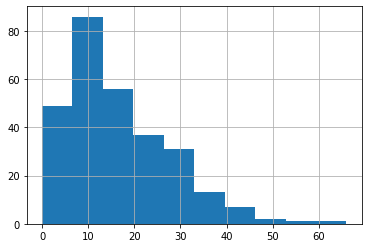

In [56]:
df_dropna.edit_distance.hist()

ANOVA f-value: 0.5608156614453004
ANOVA p-value: 0.5713830879583872

W-test statistic: 0.9249755144119263
p-value for normality: 9.660451605331133e-11

LeveneResult(statistic=0.13846481190971294, pvalue=0.8707534707646905)


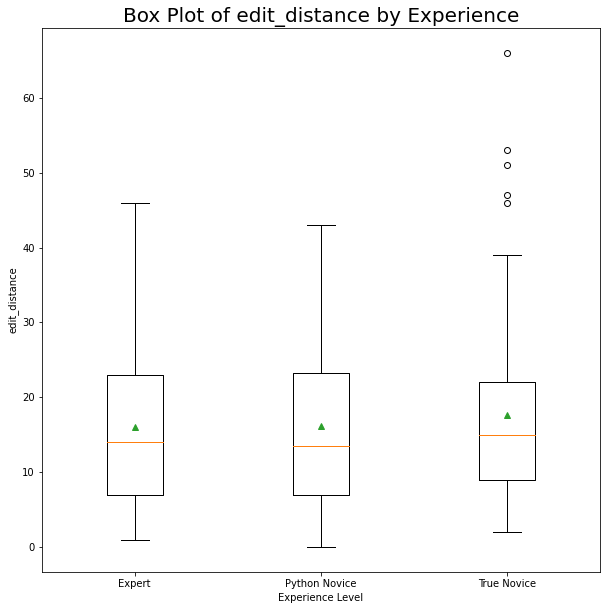

In [50]:
anova_xp_level(df_dropna, 'edit_distance')
print()
check_normality(df_dropna, 'edit_distance', 'xp_level')
print()
check_homogeneity_xp(df_dropna, 'edit_distance')

In [58]:
# Because we failed the normality assumption for an ANOVA,
# Try doing a Kruskal-Wallace H Test for independent samples
grouped = df_dropna.groupby('xp_level')
expert_edit_distances = grouped.get_group('Expert')['edit_distance']
python_novice_edit_distances = grouped.get_group('Python Novice')['edit_distance']
true_novice_edit_distances = grouped.get_group('True Novice')['edit_distance']
stats.kruskal(expert_edit_distances,
              python_novice_edit_distances,
              true_novice_edit_distances)

KruskalResult(statistic=0.41714906238298466, pvalue=0.8117405324588529)

EXPERT Query Edit Distances Summary


count    137.000000
mean      16.007299
std       10.251611
min        1.000000
25%        7.000000
50%       14.000000
75%       23.000000
max       46.000000
Name: edit_distance, dtype: float64

PYTHON NOVICE Query Edit Distances Summary


count    72.000000
mean     16.208333
std      10.684908
min       0.000000
25%       7.000000
50%      13.500000
75%      23.250000
max      43.000000
Name: edit_distance, dtype: float64

TRUE NOVICE Query Edit Distances Summary


count    74.000000
mean     17.648649
std      12.711156
min       2.000000
25%       9.000000
50%      15.000000
75%      22.000000
max      66.000000
Name: edit_distance, dtype: float64

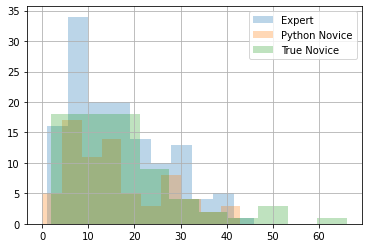

In [77]:
print(color.bold("EXPERT Query Edit Distances Summary"))
display(expert_edit_distances.describe())
expert_edit_distances.hist(alpha=0.3, label='Expert')

print(color.bold("PYTHON NOVICE Query Edit Distances Summary"))
display(python_novice_edit_distances.describe())
python_novice_edit_distances.hist(alpha=0.3,label='Python Novice')

print(color.bold("TRUE NOVICE Query Edit Distances Summary"))
display(true_novice_edit_distances.describe())
true_novice_edit_distances.hist(alpha=0.3, label='True Novice')
plt.legend()